In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# LAB 11 - The Discrete Fourier Transform (DFT)

## DUE:  12 April 2024 @ 11.59pm

## NAME: Anastasia Horne $\hspace{2.5in}$                                 STUDENT NUMBER: 10867499

The purpose of this lab is to give you practice with the discrete Fourier Transform (DFT).  Note: You must show your numerical work, and your computations must be reproducible either as a number of short python codes or (preferrably) in a single Jupyter Notebook! **Please include a PDF version of your assignment to help out the TA with the grading process.**

## Q1: Exploring the DFT

This question examines how you approach subsampling of a signal, and what are the consequences of not following the recommended approach.

**Q1-1:** **Visualizing the Fourier Matrix**: The Fourier Matrix used by the DFT is given by 

$$[W_N^{kn}] = [e^{-i2\pi kn/N}], \quad {\rm where}\quad k,n=0,N-1$$

Plot the real and imaginary components of $W_N^{kn}$ for N=4, 16, 64 and 256 points.

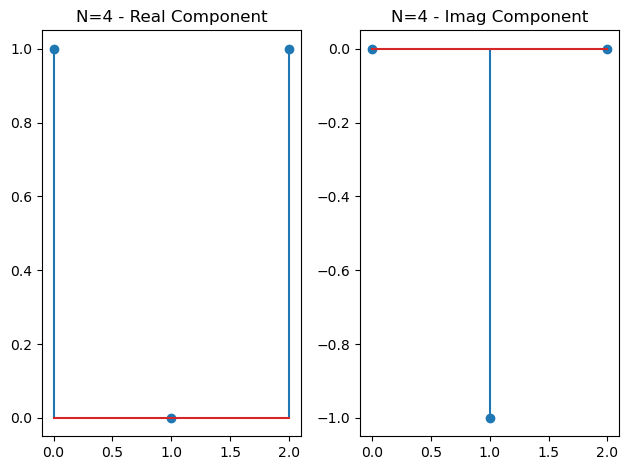

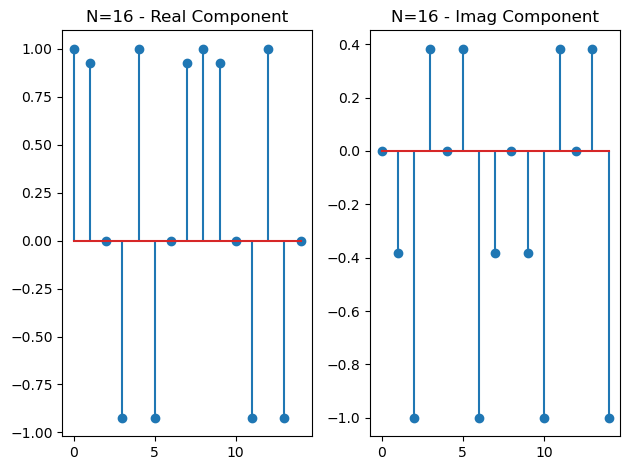

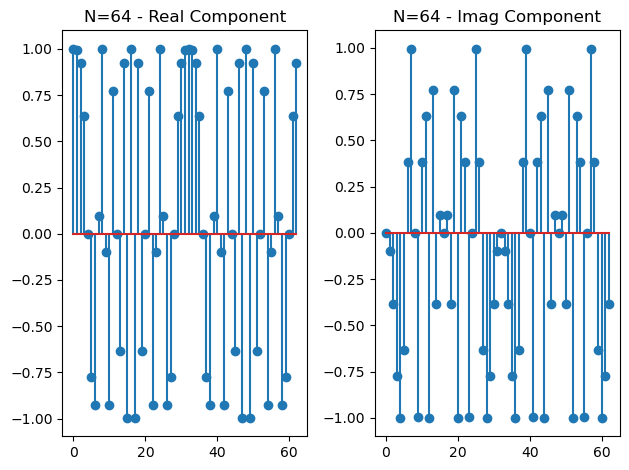

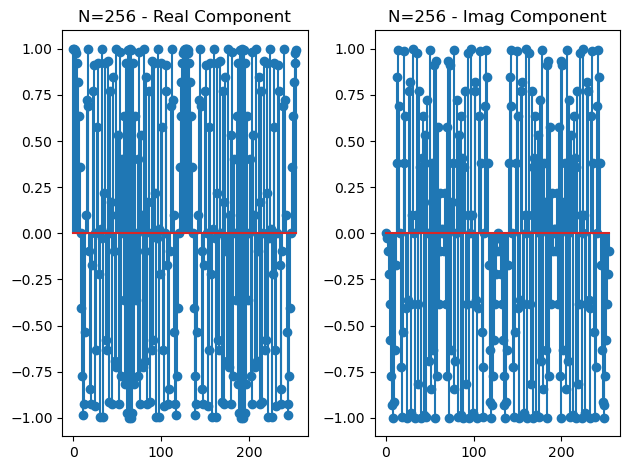

In [2]:
# . . Your answer goes here
N=np.array([4, 16, 64, 256])
for p in N:
    k=np.arange(0,p-1)
    n=np.arange(0,p-1)
    W= np.exp((-1j*2 * np.pi * k * n ) / p)
    plt.subplot(121);
    plt.stem(k,W.real);
    plt.title("N="+ str(p) +' - Real Component')
    
    plt.subplot(122);
    plt.stem(k,W.imag);
    plt.title('N='+ str(p) + ' - Imag Component')
    plt.tight_layout(); plt.show()
    

**Q1-2:** Find the **analytic** 16-point DFT of the following sequence:

$$x[n] = \delta[n]+\delta[n-4]$$

Illustrate your answer with a numerical example **without using the np.fft.fft() function**. (Hint: Think matrix multiplication using one of your results from **Q1-1**.)

##### Solution:

\begin{equation}
X[k] = \sum^{15}_{n=0} x[n] e^{-i2 \pi k n/16}
\end{equation}

We see that $\delta[n-4] = 0$, except when $n=4$, and $\delta[n]=0$, except when $n=0$. Thus $x[n]=0$, except when $n=0,4$, where it equals $1$. Thus the equation above becomes:
\begin{equation}
X[k]=1+ e^{-i2 \pi k 4  / 16}.
\end{equation}

In [3]:
# . . Your answer goes here
#x[n] is non zero only at idx 0 & 4

#fourier matrix W_16^kn
N=16
x=[1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]
k=np.arange(0,N)
n=np.arange(0,N)
W= np.exp((-1j*2 * np.pi * np.outer(k, n) ) / N)
X=np.dot(x, W)
print(X)


[2.+0.00000000e+00j 1.-1.00000000e+00j 0.-1.22464680e-16j
 1.+1.00000000e+00j 2.+2.44929360e-16j 1.-1.00000000e+00j
 0.-3.67394040e-16j 1.+1.00000000e+00j 2.+4.89858720e-16j
 1.-1.00000000e+00j 0.-6.12323400e-16j 1.+1.00000000e+00j
 2.+7.34788079e-16j 1.-1.00000000e+00j 0.-8.57252759e-16j
 1.+1.00000000e+00j]


**Q1-3:** Find the analytic 8-point DFT of the following sequence:

$$x[n] = \mathrm{cos}\left(\frac{\pi n}{4}\right) \mathrm{sin}\left(\frac{3\pi n}{4}\right)$$

Illustrate your answer with a numerical example **without using the np.fft.fft() function**.

##### Solution:

\begin{equation}
X[k] = \sum^{7}_{n=0} x[n] e^{-i2 \pi k n/8}
\end{equation}

We see that for $n=0,4$ our sine term equals $0$ and for $n=2,6$ our cosine term equals $0$. So $x[n]=0$ except for when $n=1, 3, 5, 7$. We can evaluate $x$ at these points and rewrite the above equation to get our solution: 

\begin{equation}
X[k]= 0.5 e^{-i2 \pi k/8} - 0.5 e^{-i2 \pi k 3/8} + 0.5e^{-i2 \pi k 5/8} - 0.5 e^{-i2 \pi k 7/8}
\end{equation}

In [4]:
# . . Your answer goes here
N=8
x=[0, 0.5, 0, -0.5, 0, 0.5, 0, -0.5]
k=np.arange(0,N)
n=np.arange(0,N)
W= np.exp((-1j*2 * np.pi * np.outer(k, n) ) / N)
X=np.dot(x, W)
print(X)

[ 0.00000000e+00+0.00000000e+00j -5.55111512e-17-1.11022302e-16j
  4.89858720e-16-2.00000000e+00j -6.10622664e-16+2.77555756e-16j
  0.00000000e+00+2.44929360e-16j -3.33066907e-16+1.66533454e-16j
 -1.46957616e-15+2.00000000e+00j -9.43689571e-16-2.16493490e-15j]


**Q1-4** Find the 10-point **inverse** DFT of the following sequence :

$$X[k] = 
\left\{
\begin{array}{cc}
1, & k=0\\
-1, & else\\
\end{array}
\right.
$$

Illustrate your answer with a numerical example **without using the np.fft.fft() function**. (Hint: think linearity and how you can define two useful function from the one below!)

We can rewrite $X[k]$ as:
\begin{gather}
    X[k]=X_1[k] + X_2[k] \\
    X_1[k]=1 \; \; \; \text{for } k=0 \\
    X_1[k]=-1 \; \; \; \text{for } k \neq 0
\end{gather}

Using the linearity property we know that the inverse DFT of $X_1 + X_2$ is $x_1 + x_2$. Thus we can find the inverse DFT of each $X_1$ and $X_2$, add them to together to get the full sequence $x[n]$.

We know $X_1=0$ except for $k=0$. Thus,
\begin{equation}
x_1[n] = \frac{1}{10}
\end{equation}
We see that $X_2=-1$ except for $k=0$, which would take forever to type...

In [5]:
# . . Your answer goes here
N=10
X1=[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
X2=[0, -1, -1, -1, -1, -1, -1, -1, -1, -1]
k=np.arange(0,N)
n=np.arange(0,N)
W= np.exp((1j*2 * np.pi * np.outer(k, n) ) / N)
x1=np.dot(X1, W) / N
x2= np.dot(X2, W) / N
x= x1 + x2
print(x)

[-0.8+0.00000000e+00j  0.2+0.00000000e+00j  0.2-2.22044605e-17j
  0.2-1.66533454e-16j  0.2-5.55111512e-17j  0.2+4.71674712e-16j
  0.2-1.66533454e-16j  0.2-2.22044605e-16j  0.2-7.77156117e-17j
  0.2+1.22124533e-16j]


## Q2: Evaluating 1st Derivative FD Operator Accuracy


### Background

One of the most commonly used approaches for calculating the numerical derivative of a discrete time series is to use the [finite-difference method](https://en.wikipedia.org/wiki/Finite_difference_method) (or FD).  We commonly refer to the "N-th order of accuracy" of the FD approximation as $\mathcal{O}\left(\Delta h^N\right)$.  This is commonly represented by a Taylor-series approximation of a function $f(x_0+\Delta h)$ some $\Delta h$ away from $x_0$:  

$$f(x_0 + \Delta h) = f(x_0) + \frac{f'(x_0)}{1!}\Delta h + \frac{f^{(2)}(x_0)}{2!}\Delta h^2 + \cdots + \frac{f^{(n)}(x_0)}{n!}\Delta h^n + \mathcal{O}\left(\Delta h^N\right),$$

where $n!$ denotes the factorial of $n$, and $\mathcal{O}\left(\Delta h^N\right)$ is a remainder term representing the difference between the Taylor polynomial of degree $n$ and the original function.  (Note: a larger $n$ will be more accurate than a lower $n$.)  For example, an approximation for the first-order $\mathcal{O}\left(\Delta h\right)$ first derivative approximation is given by:

$$f(x_0 + \Delta h) = f(x_0) + f'(x_0)\Delta h + \mathcal{O}\left(\Delta h\right),$$

which can be solved in the following way:

$$f'(x_0) = \frac{f(x_0 +\Delta  h) - f(x_0)}{\Delta h} +\mathcal{O}\left(\Delta h\right).$$

Or, as an approximation,

$$f'(x_0) \approx \frac{f(x_0 + \Delta h) - f(x_0)}{\Delta h}.$$

Generally speaking, a $\mathcal{O}\left(\Delta h^N\right)$ derivative approximation is the equivalent of 

$$f'(x_0) \approx \sum_{k=-N+1}^{N-1} c_k \, f(x_0+k\Delta h),$$

where $c_k$ are the FD coefficients.

**Q2-1** Let's use the DFT to evaluate the accuracy of some fairly standard approximations for the first derivative.  

   * 3-point $\mathcal{O}\left(\Delta h^2\right)$ with coefficients $c^{(2)}_k=[-1/2,0,1/2]$
   * 5-point $\mathcal{O}\left(\Delta h^4\right)$ with coefficients $c^{(4)}_k=[1/12,-2/3,0,2/3,-1/12]$
   * 7-point $\mathcal{O}\left(\Delta h^6\right)$ with coefficients $c^{(6)}_k=[-1/60,3/20,-3/4,0,3/4,-3/20,1/60]$
   * 9-point $\mathcal{O}\left(\Delta h^8\right)$ with coefficients $c^{(8)}_k=[1/280,-4/105,1/5,-4/5,0,4/5,-1/5,4/105,-1/280]$
   
(a) Compute a 64-point DFT for each of the four 1st-derivative approximations listed above assuming $\Delta h=1$.  (Note that this requires zero padding 61 points for the 1st case, 59 points for the 2nd case, 57 for the 3rd case, and 55 for the 4th case.)  Use 

     np.fft.fftshift()
     
to put these into "logical" order.

In [6]:
# . . Your answer goes here
c2= [-0.5, 0, 0.5]
c4= [1/12, -2/3, 0, 2/3, -1/12]
c6= [-1/60, 3/20, -3/4, 0, 3/4, -3/20, 1/60]
c8=[1/280, -4/105, 1/5, -4/5, 0 ,4/5, -1/5, 4/105, -1/280]
N=64

pc2= np.zeros(64); pc2[0:3]=c2;
pc4= np.zeros(64); pc4[0:5]=c4;
pc6= np.zeros(64); pc6[0:7]=c6;
pc8= np.zeros(64); pc8[0:9]=c8;

FFTpc2= np.fft.fftshift(np.fft.fft(pc2))
FFTpc4= np.fft.fftshift(np.fft.fft(pc4))
FFTpc6= np.fft.fftshift(np.fft.fft(pc6))
FFTpc8= np.fft.fftshift(np.fft.fft(pc8))


(b) Compute the frequency axis (also in "logical order") using 

In [7]:
# . . Your answer goes here
freq= np.fft.fftshift(np.linspace(-0.5, 0.5, 64))

(c) Plot the Fourier spectra from your DFT calculation for these four approximations on the same plot.

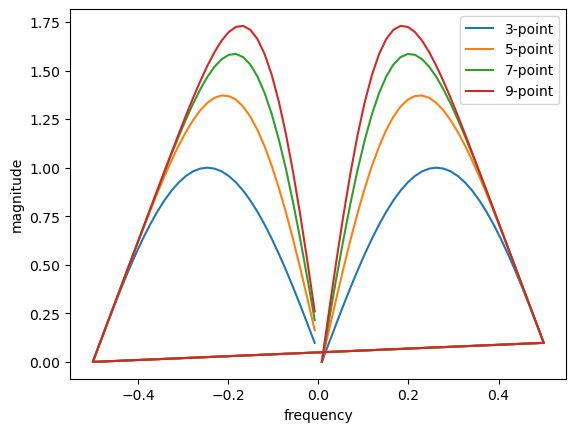

In [8]:
# . . Your answer goes here
plt.plot(freq, np.abs(FFTpc2), label="3-point")
plt.plot(freq, np.abs(FFTpc4), label="5-point")
plt.plot(freq, np.abs(FFTpc6), label="7-point")
plt.plot(freq, np.abs(FFTpc8), label="9-point")
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.legend()

(d) To examine the accuracy of these four approximations, include a plot on the same graph of the expected **analytic spectral response** (i.e., $\left|\frac{\partial}{\partial t}\right| \Longleftrightarrow \left| 2\pi i f\right|=2\pi |f|$). Don't forget to include a legend!
     

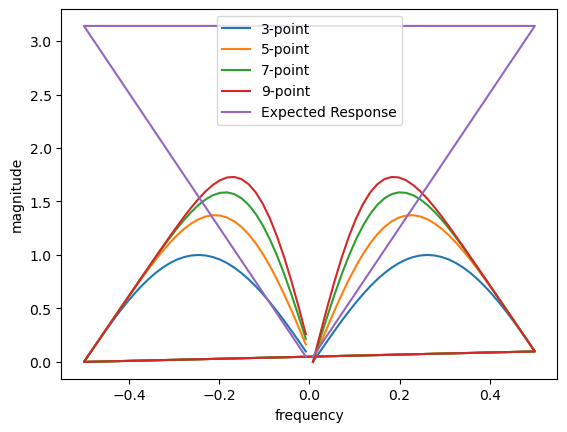

In [9]:
# . . Your answer goes here
Er= 2 * np.pi * np.abs(freq)

plt.plot(freq, np.abs(FFTpc2), label="3-point")
plt.plot(freq, np.abs(FFTpc4), label="5-point")
plt.plot(freq, np.abs(FFTpc6), label="7-point")
plt.plot(freq, np.abs(FFTpc8), label="9-point")
plt.plot(freq, Er, label="Expected Response")
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.legend()